# Plotting all spectra within the spec folder as well as other spectral plots for the evolution of 21gmj

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.time import Time
import glob,os
from datetime import datetime
import matplotlib
from scipy.ndimage import gaussian_filter1d

In [4]:
z = 0.0033
expd = 2459293.3-2400000.5
expd

59292.799999999814

files gathered:  ['/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-03-21-MMT-Bino-280.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210328_redblu_052923.231.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210326_redblu_111326.459.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210322_redblu_053203.371.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210402_redblu_073657.327.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-03-23-MMT-Bino-280.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210408_redblu_094135.933.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210422_redblu_074445.618.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210414_redblu_100011.417.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-04-17-MMT-Bino-1000.fits', '/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-04-01-MMT-Bino-1000.fits', '/Users/sfdavis/projects/SN2021gmj//spec/tns_2021gmj_2021

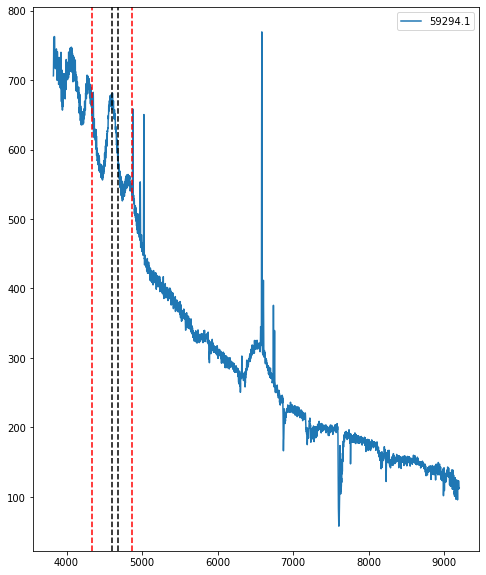

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210328_redblu_052923.231.fits
2021-03-28T05:29:23.231
8.400000000183354


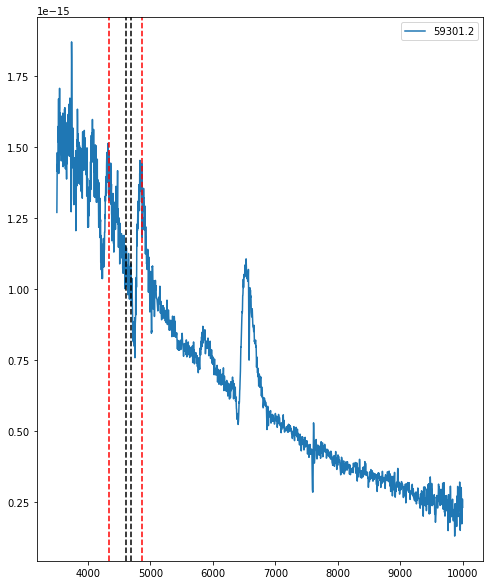

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210326_redblu_111326.459.fits
2021-03-26T11:13:26.459
6.7000000001862645


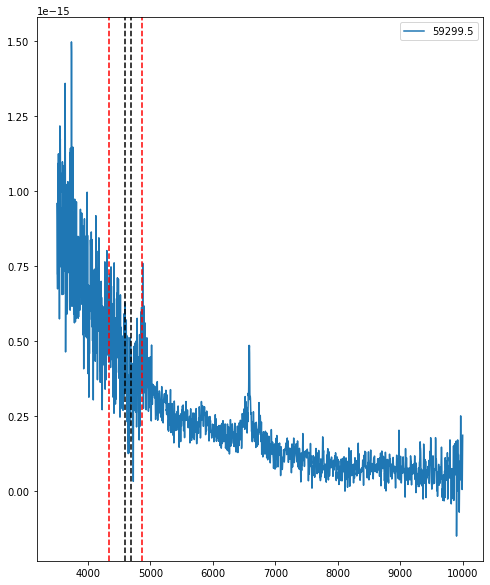

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210322_redblu_053203.371.fits
2021-03-22T05:32:03.371
2.400000000183354


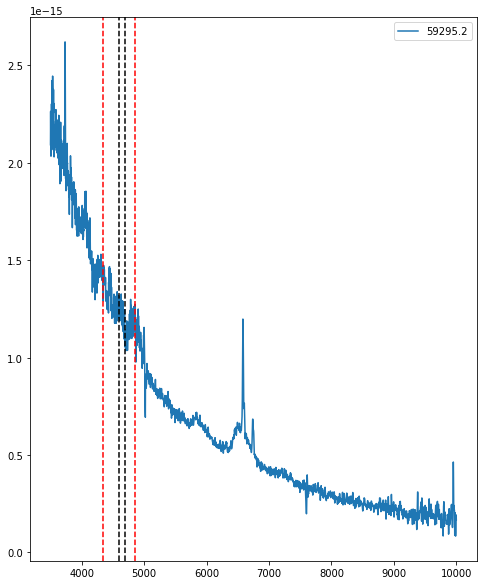

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210402_redblu_073657.327.fits
2021-04-02T07:36:57.327
13.500000000189175


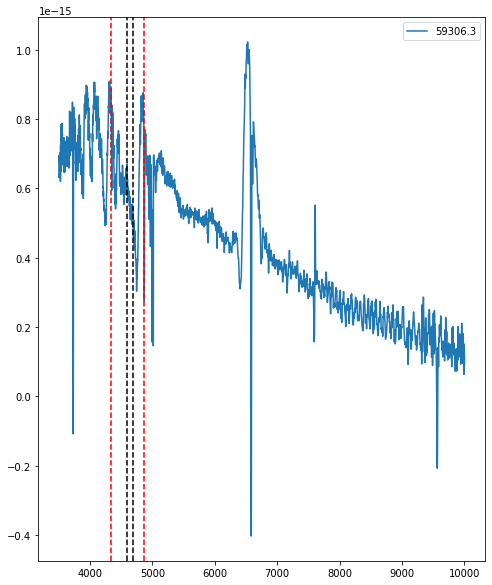

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-03-23-MMT-Bino-280.fits
2021-03-23T03:31:43
3.3000000001848093


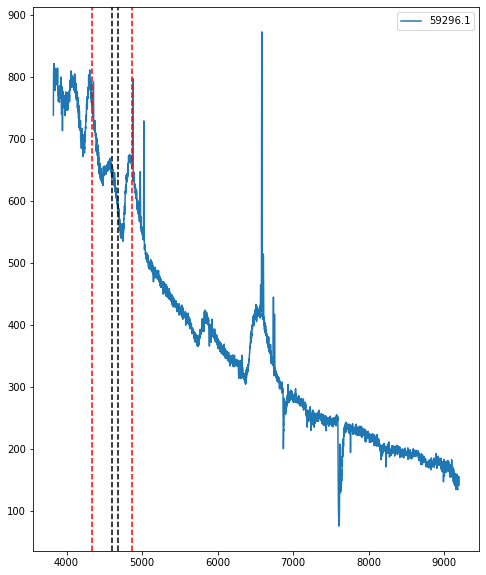

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210408_redblu_094135.933.fits
2021-04-08T09:41:35.933
19.60000000018772


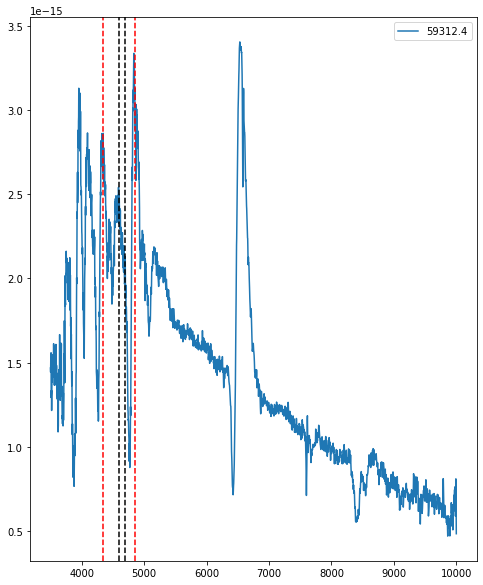

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210422_redblu_074445.618.fits
2021-04-22T07:44:45.618
33.500000000189175


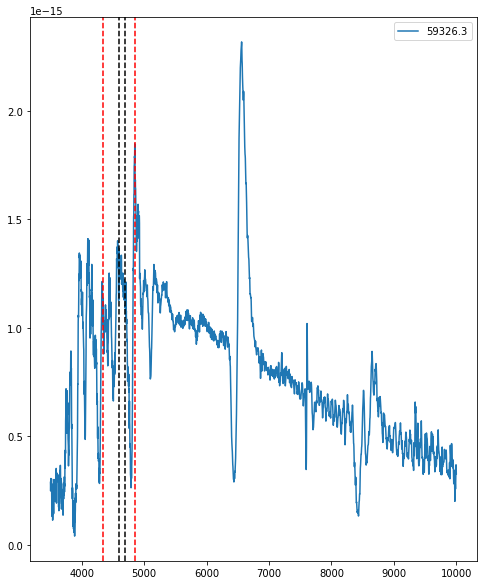

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj_20210414_redblu_100011.417.fits
2021-04-14T10:00:11.417
25.60000000018772


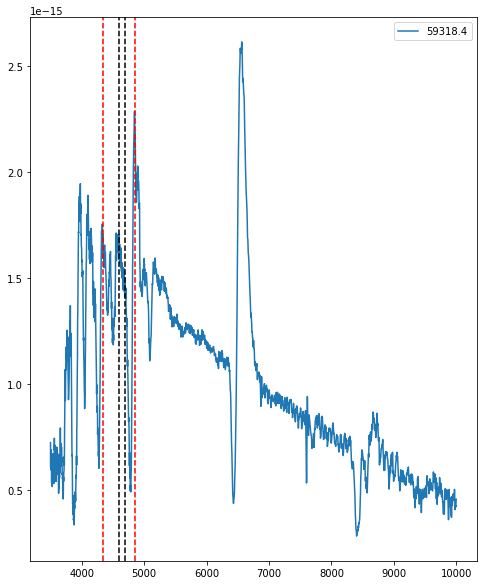

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-04-17-MMT-Bino-1000.fits
2021-04-17T05:08:01
28.400000000183354


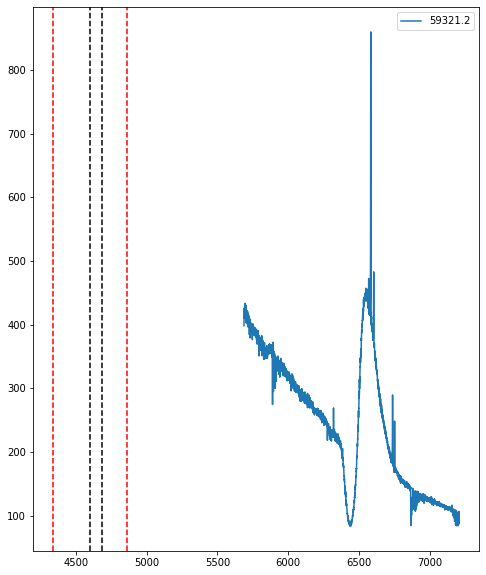

/Users/sfdavis/projects/SN2021gmj//spec/SN2021gmj-2021-04-01-MMT-Bino-1000.fits
2021-04-01T03:03:48
12.30000000018481


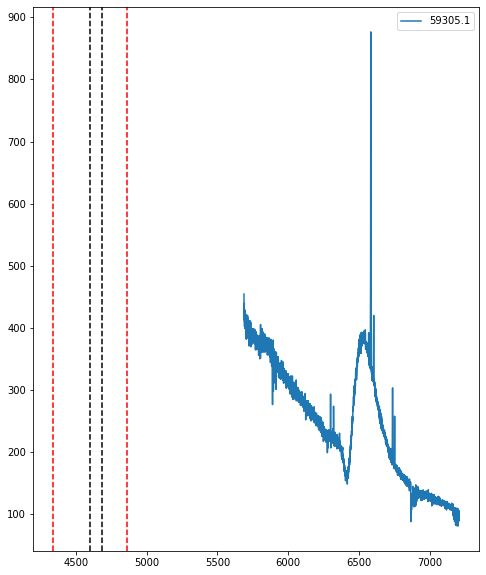

/Users/sfdavis/projects/SN2021gmj//spec/tns_2021gmj_2021-03-21_01-22-39_Ekar_AFOSC_Padova-Asiago.dat


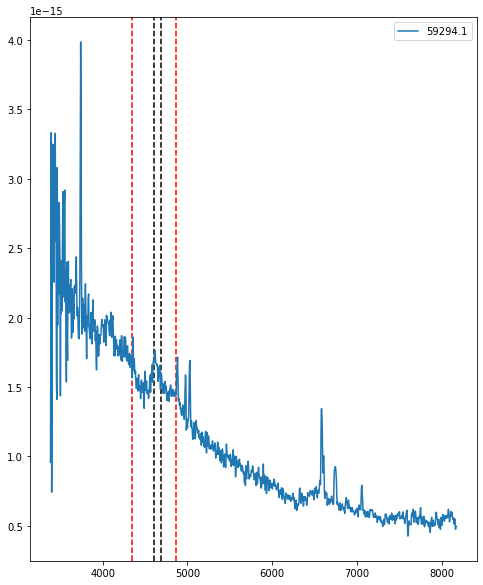

/Users/sfdavis/projects/SN2021gmj//spec/tns_2021gmj_2021-03-20_20-35-50_LT_SPRAT_ZTF.spec


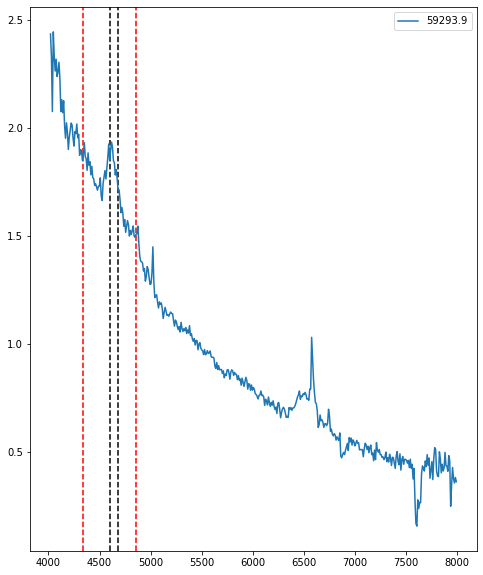

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210414.284.coadd.blotch-ui.flm


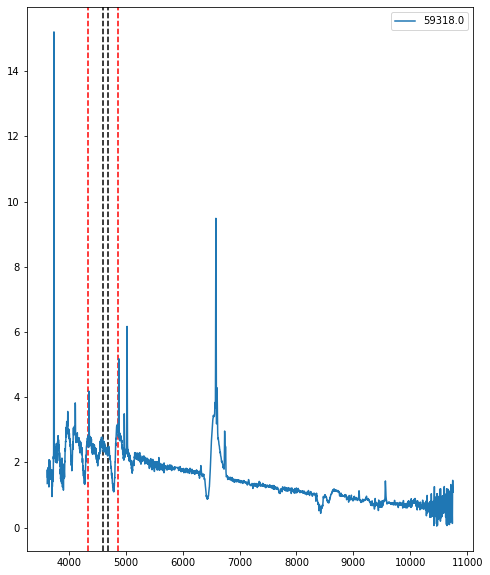

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210518.275.coadd.blotch-ui.flm


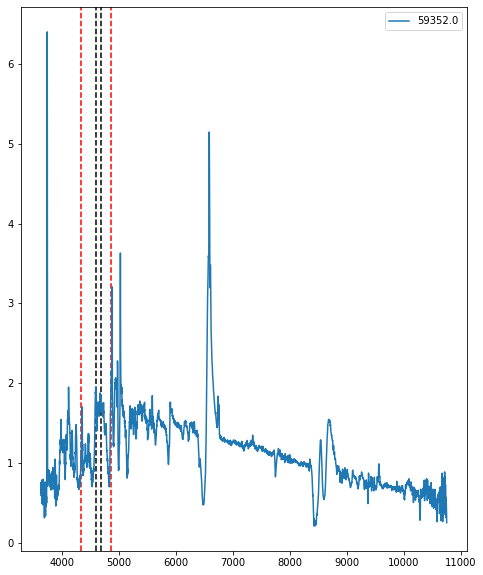

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210605.305.coadd.blotch-ui.flm


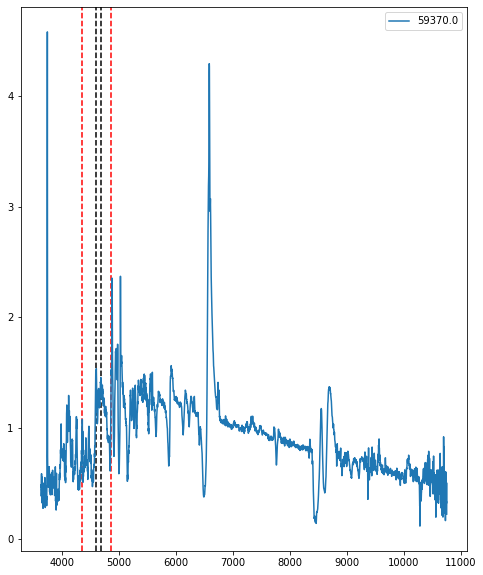

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210405.157.coadd.blotch-ui.flm


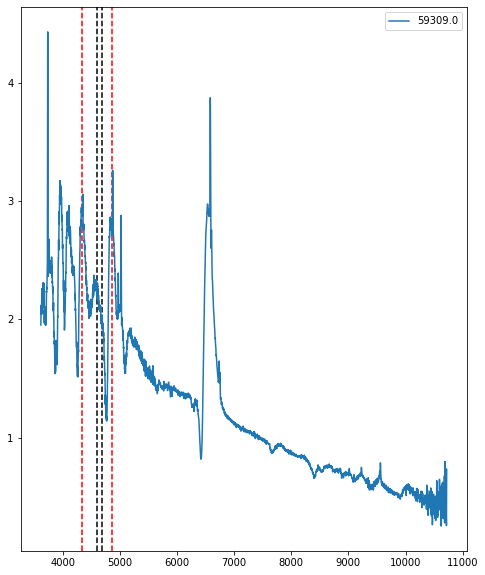

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210418.184.coadd.blotch-ui.flm


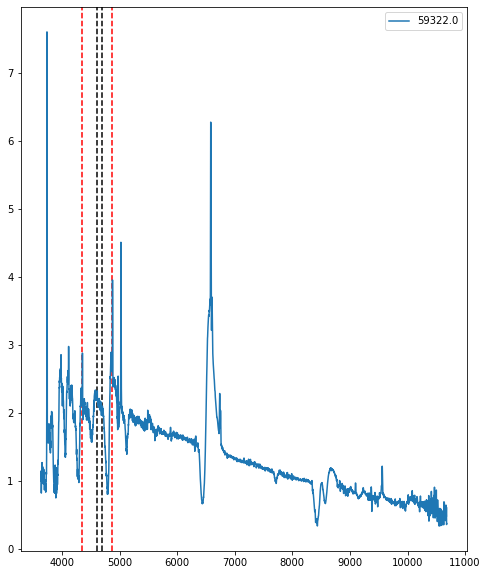

/Users/sfdavis/projects/SN2021gmj//spec/sn2021gmj-20210509.322.coadd.blotch-ui.flm


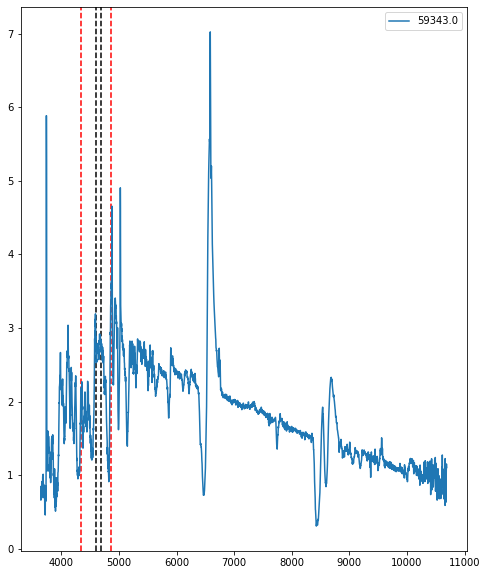

          date      mjd  phase exp_time      telescope  \
0   2021-03-21  59294.1    1.3     3600   MMT/Binospec   
1   2021-03-28  59301.2    8.4     1800  LCO 2m/FLOYDS   
2   2021-03-26  59299.5    6.7     1800  LCO 2m/FLOYDS   
3   2021-03-22  59295.2    2.4     1800  LCO 2m/FLOYDS   
4   2021-04-02  59306.3   13.5     1800  LCO 2m/FLOYDS   
5   2021-03-23  59296.1    3.3     1800   MMT/Binospec   
6   2021-04-08  59312.4   19.6     1800  LCO 2m/FLOYDS   
7   2021-04-22  59326.3   33.5     1800  LCO 2m/FLOYDS   
8   2021-04-14  59318.4   25.6     1800  LCO 2m/FLOYDS   
9   2021-04-17  59321.2   28.4     2700   MMT/Binospec   
10  2021-04-01  59305.1   12.3     5400   MMT/Binospec   
11  2021-03-21  59294.1    1.3        -     Ekar/AFOSC   
12  2021-03-20  59293.9    1.1        -       LT/SPRAT   
13  2021-04-14  59318.0   25.2        -              -   
14  2021-05-18  59352.0   59.2        -              -   
15  2021-06-05  59370.0   77.2        -              -   
16  2021-04-05

In [6]:
path = os.getcwd()+'/'
spec_path = path+'/spec/'
fig_path = path+'/figures/'
files = glob.glob(spec_path+'*fits')
for file in glob.glob(spec_path+'tns*'):
    files.append(file)
for file in glob.glob(spec_path+'*.flm'):
    files.append(file)
print('files gathered: ',files)

telDict = {'2m0-01': 'LCO 2m/FLOYDS', 'mmt_f5_adc': 'MMT/Binospec'}


def plotFlash():
    plt.axvline(x=4686,linestyle='--',color='black')
    plt.axvline(x=4600,linestyle='--',color='black')
    
    # h gamma & beta
    plt.axvline(x=4340,linestyle='--',color='red')
    plt.axvline(x=4861,linestyle='--',color='red')
    return


dates = []
mjd = []
exposure = []
telescope = []
waves = []
fluxes = []
phase = []
datfiles = []
for file in files:
    plt.figure(figsize=(8,10))
    print(file)
    NIR = 0
    if 'tns' not in file and 'flm' not in file:
        f = fits.open(file)
        dates.append(f[0].header['DATE-OBS'].split('T')[0])
        print(f[0].header['DATE-OBS'])
        mjd.append(round(Time(f[0].header['DATE-OBS']).mjd,1))
        exposure.append(int(round(f[0].header['EXPTIME'],0)))
        telescope.append(telDict[f[0].header['TELESCOP']])
        phase.append(mjd[-1]-expd)
        print(phase[-1])

        if 'LCO' in telescope[-1]:
            #print(f[0].header)
            crval1 = f[0].header['CRVAL1']
            cdel1 = f[0].header['CD1_1']
            crpix1 = f[0].header['CRPIX1']
            firstpix = crval1-cdel1*(crpix1-1)
            wave = [cdel1*i+firstpix for i in range(len(f[0].data[0][0]))]   
            flux = f[0].data[0][0]
            plt.plot(np.array(wave),np.array(flux),label=str(mjd[-1]))
            
            # plotting locations of flash features
            plotFlash()
            
            plt.legend()
            plt.show()

        elif 'MMT' in telescope[-1]:
            crval1 = f[0].header['CRVAL1']
            cdel = f[0].header['CD1_1']
            wave = [crval1+i*cdel for i in range(len(f[0].data))]
            flux = f[0].data
            plt.plot(wave,flux,label=str(mjd[-1]))
            
            # plotting locations of flash features
            plotFlash()
        
            plt.legend()
            plt.show()

    elif 'NIR' not in file:
        wave,flux = np.loadtxt(file,unpack=True)[:2]
        
        if 'tns' in file:
            date, time = file.split('_')[2:4]
            dates.append(date)
            dateTime = date+'T'+':'.join(time.split('-'))
            mjd.append(round(Time(dateTime).mjd,1))
            exposure.append('-')
            telescope.append('/'.join(file.split('_')[4:6]))
            phase.append(mjd[-1]-expd)
        else:
            #/Users/sfdavis/projects/SN2021gmj/spec/sn2021gmj-20210414.284.coadd.blotch-ui.flm
            date, time = file.split('-')[1].split('.')[0:2]
            dateTime = '-'.join([date[0:4],date[4:6],date[6:]])+'T00:00:00'
            date = Time(dateTime,format='isot').mjd+(float(time)/1000.)
            date = Time(date,format='mjd')
            dates.append(date.iso.split()[0])
            mjd.append(round(Time(dateTime).mjd,1))
            exposure.append('-')
            telescope.append('-')
            phase.append(mjd[-1]-expd)
        
        # plotting locations of flash features
        plotFlash()
        
        plt.plot(wave,flux,label=str(mjd[-1]))
        plt.legend()
        plt.show()
        
    else:
        NIR = 1
    
    if not NIR:
        # write out dat file for velocity and other codes
        filename = spec_path+'2021gmj_'+telescope[-1].split('/')[0].split()[0]+'_'+str(round(phase[-1],1))+'.dat'
        with open(filename,'w') as f:
            for i in range(len(wave)):
                f.write(str(wave[i])+' '+str(flux[i])+'\n')

        datfiles.append(filename)
        waves.append(wave)
        fluxes.append(flux)


# make a dataframe for the spectra
df = pd.DataFrame()
specDict = {'date': dates, 'mjd': mjd, 'phase': phase, 'exp_time': exposure,
            'telescope': telescope, 'file': files, 'datfile': datfiles}
for key in specDict.keys():
    df[key] = specDict[key]
print(df)
df.to_csv(spec_path+'specDF.csv')

[12  0 11  3  5  2  1 10  4 16  6 13  8  9 17  7 18 14 15]


<ipython-input-7-e0da91e64bba>:19: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
<ipython-input-7-e0da91e64bba>:18: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(fluxSmooth)+i+scale,color=color)
<ipython-input-7-e0da91e64bba>:19: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)


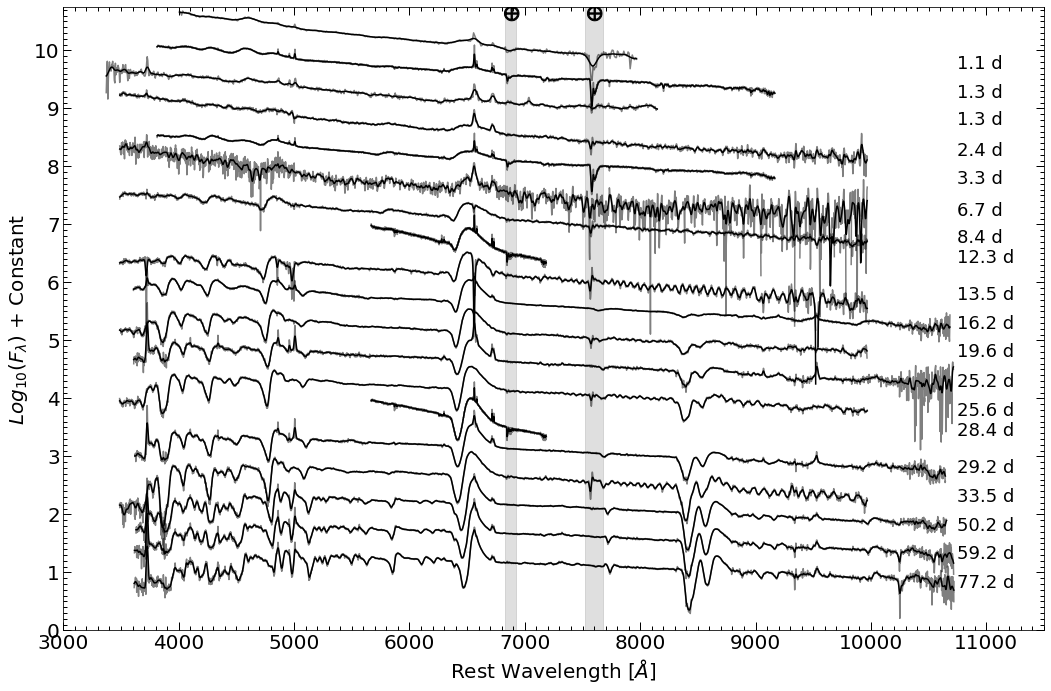

In [7]:
i = 0
scale = len(phase)*3.0/4.0-1.5
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 20})

print(np.argsort(phase))
for ind in np.argsort(phase):
    wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
    wave = wave/(1.+z)
    
    w = [(wave > 5500) & (wave < 6000)][0]
    integ0 = np.trapz(flux[w],wave[w])
    off = 1.5/integ0
    flux = np.array([x*off for x in flux])
     
    color = 'black'
    fluxSmooth = np.array(gaussian_filter1d(flux, 3))
    plt.plot(wave,np.log10(fluxSmooth)+i+scale,color=color)
    plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
    
    w = [(wave > 6000) & (wave < 6100)][0]
    plt.text(10750,np.log10(flux[w][0])+i+scale-0.5,str(round(phase[ind],1))+' d',fontsize=18)
    '''if round(phase[ind],1) == 1.3 and max(wave) < 9000:
        plt.text(10100,np.log10(flux[-1])+i+scale-0.2,str(dates[ind][5:]),fontsize=18)
        plt.text(10100,np.log10(flux[-1])+i+scale-0.3,str(round(phase[ind],1))+' d',fontsize=14)
    elif round(phase[ind],1) == 6.7:
        plt.text(10100,np.log10(flux[-1])+i+scale-0.5,str(dates[ind][5:]),fontsize=18)
        plt.text(10100,np.log10(flux[-1])+i+scale-0.6,str(round(phase[ind],1))+' d',fontsize=14)
    else:
        plt.text(10100,np.log10(flux[-1])+i+scale,str(dates[ind][5:]),fontsize=18)
        plt.text(10100,np.log10(flux[-1])+i+scale-0.1,str(round(phase[ind],1))+' d',fontsize=14)
        w = np.argmin(abs(wave-5400))
        plt.text(5400,np.log10(flux[w])+i+scale+0.01,str(round(phase[ind],1))+' d',fontsize=14)'''
    i -= 0.5
    
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,20.00,1.0))
plt.gca().set_yticks(np.arange(0.0,20.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(3000,12000,1000))
plt.gca().set_xticks(np.arange(3000,12000,100), minor=True)
plt.gca().xaxis.set_ticks_position('both')

# telluric regions
plt.gca().axvspan(0.685/(1.+z)*1e4, 0.695/(1.+z)*1e4, alpha=0.25, color='grey')
plt.gca().axvspan(0.755/(1.+z)*1e4, 0.77/(1.+z)*1e4, alpha=0.25, color='grey')
plt.plot((0.685+0.695)/(2*(1.+z))*1e4,scale-2.1,marker='$\\bigoplus$',markersize=15,color='k')
plt.plot((0.755+0.77)/(2*(1.+z))*1e4,scale-2.1,marker='$\\bigoplus$',markersize=15,color='k')

# SN label
#plt.text(3500,0.2,'SN 2021gmj',fontsize=20,horizontalalignment='left')

#plt.axvline(x=5169,linestyle='--',color='blue')
#plt.axvline(x=4861,linestyle='--',color='blue')

plt.xlim([3000,11500])
#plt.xlim([4500,5500])
plt.ylim([0,scale-2.0])
plt.tight_layout()
plt.savefig(fig_path+'spec_evo.png',format='png',dpi=300)
plt.show()

In [69]:
# write latex table
columns = ['date','mjd','phase','telescope']
for ind in np.argsort(phase):
    tdf = df[(df['phase'] == phase[ind])]
    
    for ind,row in tdf.iterrows():
        for col in columns:
            if col == 'telescope' and row[col] == '-':
                print('Shane/Kast',end =" \\\ \n")
            elif col == 'telescope':
                print(str(row[col]),end=' \\\ \n')
            else:
                if col != 'phase':
                    print(str(row[col]),end=" & ")
                else:
                    print(str(round(row[col],1)),end=" & ")
        #print()
    #print(tdf)
'''for ind,row in df.iterrows():
    for val in row:
        print(str(val),end =" & ")
    print('// \n')'''

2021-03-20 & 59293.9 & 1.1 & LT/SPRAT \\ 
2021-03-21 & 59294.1 & 1.3 & MMT/Binospec \\ 
2021-03-21 & 59294.1 & 1.3 & Ekar/AFOSC \\ 
2021-03-21 & 59294.1 & 1.3 & MMT/Binospec \\ 
2021-03-21 & 59294.1 & 1.3 & Ekar/AFOSC \\ 
2021-03-22 & 59295.2 & 2.4 & LCO 2m/FLOYDS \\ 
2021-03-23 & 59296.1 & 3.3 & MMT/Binospec \\ 
2021-03-26 & 59299.5 & 6.7 & LCO 2m/FLOYDS \\ 
2021-03-28 & 59301.2 & 8.4 & LCO 2m/FLOYDS \\ 
2021-04-01 & 59305.1 & 12.3 & MMT/Binospec \\ 
2021-04-02 & 59306.3 & 13.5 & LCO 2m/FLOYDS \\ 
2021-04-05 & 59309.0 & 16.2 & Shane/Kast \\ 
2021-04-08 & 59312.4 & 19.6 & LCO 2m/FLOYDS \\ 
2021-04-14 & 59318.0 & 25.2 & Shane/Kast \\ 
2021-04-14 & 59318.4 & 25.6 & LCO 2m/FLOYDS \\ 
2021-04-17 & 59321.2 & 28.4 & MMT/Binospec \\ 
2021-04-18 & 59322.0 & 29.2 & Shane/Kast \\ 
2021-04-22 & 59326.3 & 33.5 & LCO 2m/FLOYDS \\ 
2021-05-09 & 59343.0 & 50.2 & Shane/Kast \\ 
2021-05-18 & 59352.0 & 59.2 & Shane/Kast \\ 


'for ind,row in df.iterrows():\n    for val in row:\n        print(str(val),end =" & ")\n    print(\'// \n\')'

<ipython-input-7-2844960dc5f6>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  integ0 = np.trapz(flux[w],wave[w])
<ipython-input-7-2844960dc5f6>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  integ0 = np.trapz(flux[w],wave[w])


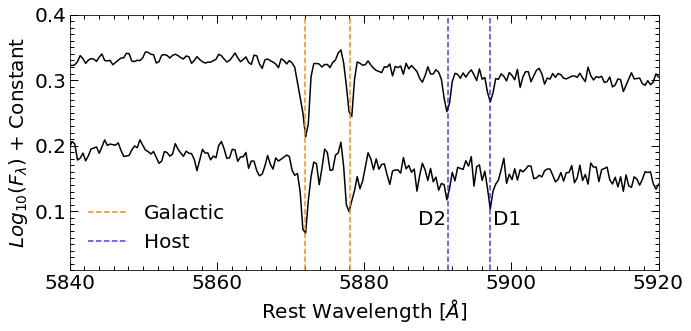

In [7]:
# plot MMT for NaI 
mmt = df[(round(df['phase'],1)==12.3)|(round(df['phase'],1)==28.4)]

i=0
scale = 2.85
plt.figure(figsize=(10,5))
for ind,row in mmt.iterrows():
    wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
    wave = wave/(1.+z)

    w = [(wave > 5500) & (wave < 6000)]
    integ0 = np.trapz(flux[w],wave[w])
    off = 1.0/integ0
    flux = np.array([x*off for x in flux])

    plt.plot(wave,np.log10(flux)+i+scale,color='black')
    i = i-0.15
    
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,1.00,0.1))
plt.gca().set_yticks(np.arange(0.0,1.00,0.01), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(5700,6100,20))
plt.gca().set_xticks(np.arange(5700,6100,2), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.xlim([5840,5920])
plt.ylim([0.01,0.4])

# labels for NaID
plt.axvline(x=5878.1,color='darkorange',linestyle='--',label='Galactic')
plt.axvline(x=5872.0,color='darkorange',linestyle='--')
plt.axvline(x=5897.1,color='b',alpha=0.75,linestyle='--',label='Host')
plt.axvline(x=5891.4,color='b',alpha=0.75,linestyle='--')
plt.text(5891.1,0.08,'D2',horizontalalignment='right')
plt.text(5897.5,0.08,'D1',horizontalalignment='left')


plt.legend(frameon=False,loc=3)
plt.tight_layout()
plt.savefig('/Users/sfdavis/projects/SN2021gmj/figures/NaID.png',format='png',dpi=300)
plt.show()

[12  0 11  3  5  2  1 10  4 14  6 13  8  9 15  7 16]


<ipython-input-172-c221006d8d36>:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  integ0 = np.trapz(flux[w],wave[w])
<ipython-input-172-c221006d8d36>:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.text(6000,np.log10(flux[w][0])+i+scale+0.05,str(round(phase[ind],1))+' d'+'\n('+telescope[ind]+')',fontsize=14)
<ipython-input-172-c221006d8d36>:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

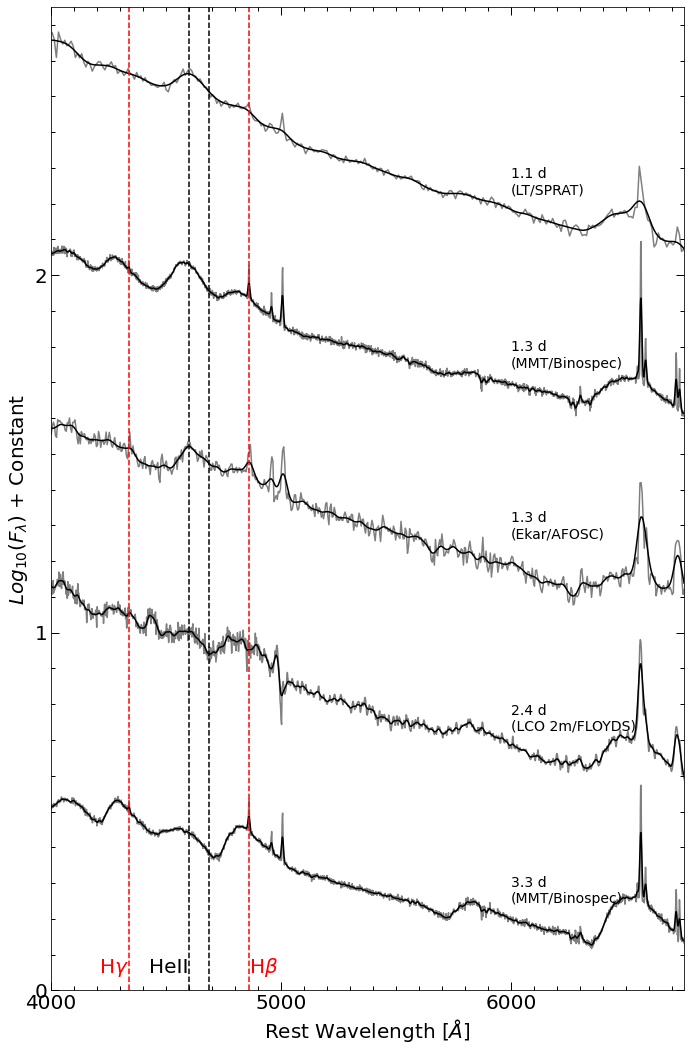

In [172]:
# let's plot some "flash" features

def plotFlash():
    flash1 = 4686
    flash2 = 4600
    plt.axvline(x=flash1,linestyle='--',color='black')
    plt.axvline(x=flash2,linestyle='--',color='black')
    
    # h gamma & beta
    hgamma = 4340
    hbeta = 4861
    plt.axvline(x=hgamma,linestyle='--',color='red')
    plt.axvline(x=hbeta,linestyle='--',color='red')
    
    plt.text(flash2,0.05,r'HeII',color='black',horizontalalignment='right')
    
    plt.text(hgamma,0.05,r'H$\gamma$',color='red',horizontalalignment='right')
    plt.text(hbeta,0.05,r'H$\beta$',color='red',horizontalalignment='left')
    return

i = 0
scale = 4.75
plt.figure(figsize=(10,15))
matplotlib.rcParams.update({'font.size': 20})

print(np.argsort(phase))
for ind in np.argsort(phase):
    if phase[ind] < 5:
        wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
        wave = wave/(1.+z)

        w = [(wave > 5500) & (wave < 6000)]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        fluxSmooth = np.array(gaussian_filter1d(flux, 3))
        plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')
        plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
        w = [(wave > 6000) & (wave < 6100)]
        plt.text(6000,np.log10(flux[w][0])+i+scale+0.05,str(round(phase[ind],1))+' d'+'\n('+telescope[ind]+')',fontsize=14)
        i -= 0.5
    
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,10.00,1.0))
plt.gca().set_yticks(np.arange(0.0,10.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(3000,11000,1000))
plt.gca().set_xticks(np.arange(3000,11000,100), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plotFlash()

plt.xlim([4000.,6750.])
plt.ylim([0,2.75])
plt.tight_layout()
plt.savefig('/Users/sfdavis/projects/SN2021gmj/figures/flash.png',format='png',dpi=300)
plt.show()

[12  0 11  3  5  2  1 10  4 14  6 13  8  9 15  7 16]


<ipython-input-171-8609a92fb559>:21: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)


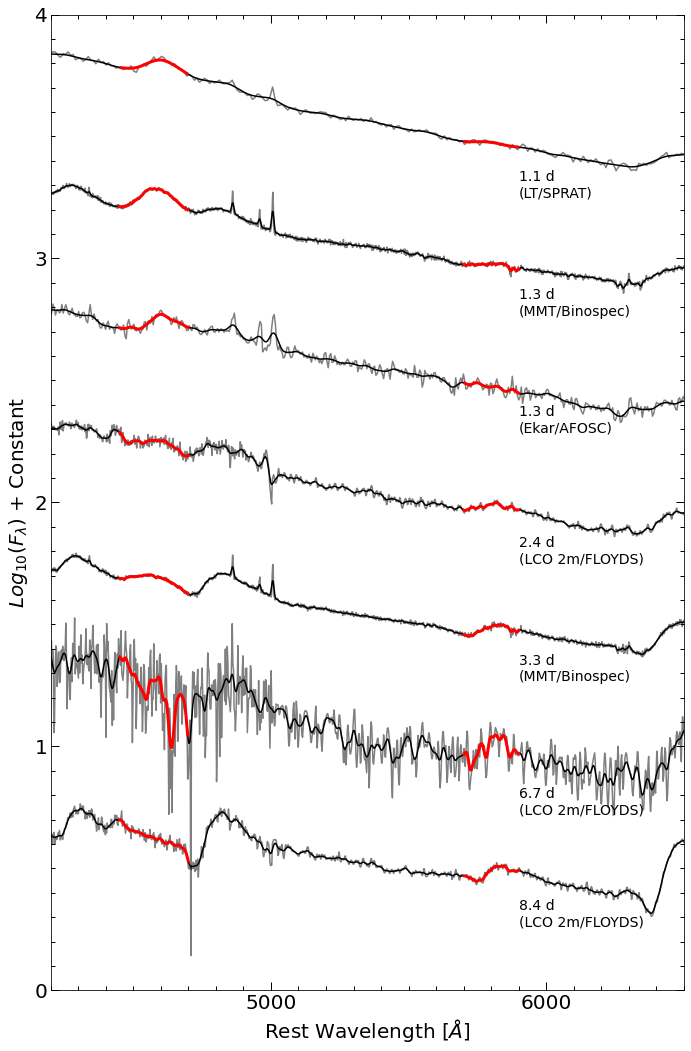

In [171]:
# highlighting He I regions

i = 0
scale = 6.0
plt.figure(figsize=(10,15))
matplotlib.rcParams.update({'font.size': 20})

print(np.argsort(phase))
for ind in np.argsort(phase):
    if phase[ind] < 10:
        wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
        wave = wave/(1.+z)

        w = [(wave > 5500) & (wave < 6000)][0]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        fluxSmooth = np.array(gaussian_filter1d(flux, 3))
        plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')
        plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
        
        # highlight He I emission regions
        w = [(wave > 4450) & (wave < 4700)][0]
        q = [(wave > 5700) & (wave < 5900)][0]
        plt.plot(wave[w],np.log10(fluxSmooth[w])+i+scale,color='red',linewidth=3.0)
        plt.plot(wave[q],np.log10(fluxSmooth[q])+i+scale,color='red',linewidth=3.0)
        
        w = [(wave > 6000) & (wave < 6100)][0]
        plt.text(5900,np.log10(flux[w][0])+i+scale-0.175,
                 str(round(phase[ind],1))+' d'+'\n('+telescope[ind]+')',fontsize=14)
        i -= 0.5
    
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,10.00,1.0))
plt.gca().set_yticks(np.arange(0.0,10.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(3000,11000,1000))
plt.gca().set_xticks(np.arange(3000,11000,100), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.xlim([4200.,6500.])
plt.ylim([0,4.])
plt.tight_layout()
plt.savefig('/Users/sfdavis/projects/SN2021gmj/figures/HeI_compare_red.png',format='png',dpi=300)
plt.show()

[12  0 11  3  5  2  1 10  4 14  6 13  8  9 15  7 16]


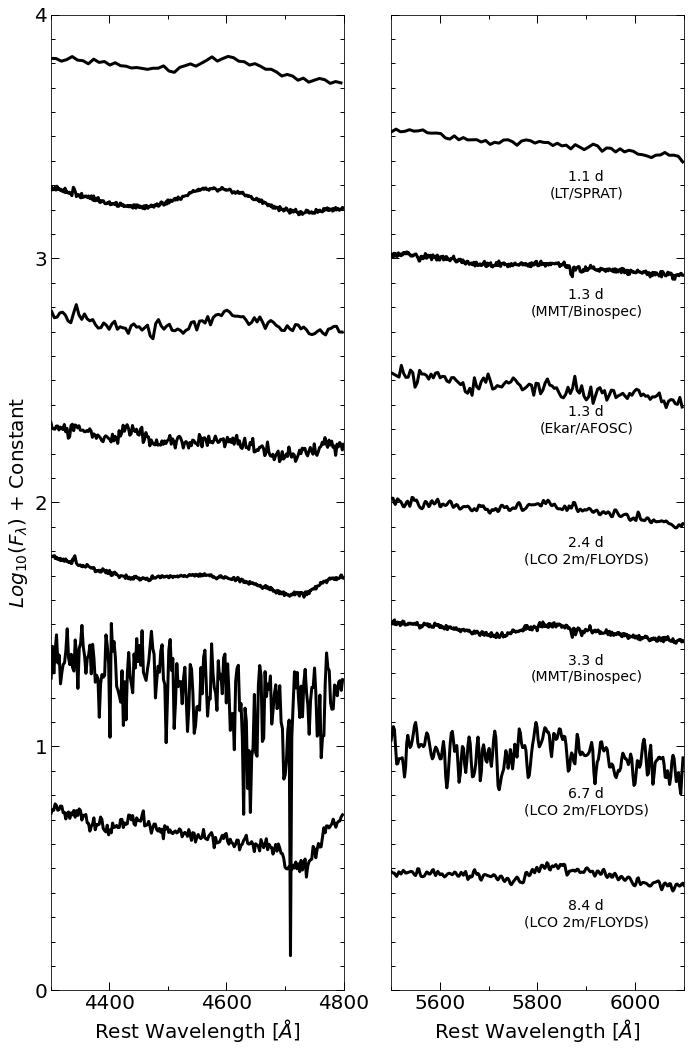

In [173]:
# side by side He I regions

i = 0
scale = 6.0
#plt.figure(figsize=(10,15))
fig, axs = plt.subplots(1, 2, figsize=(10, 15), sharey=True)
matplotlib.rcParams.update({'font.size': 20})

print(np.argsort(phase))
for ind in np.argsort(phase):
    if phase[ind] < 10:
        wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
        wave = wave/(1.+z)

        w = [(wave > 5500) & (wave < 6000)][0]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        #fluxSmooth = np.array(gaussian_filter1d(flux, 3))
        #plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')
        #plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
        
        # highlight He I emission regions
        w = [(wave > 4300) & (wave < 4800)][0]
        q = [(wave > 5500) & (wave < 6100)][0]
        axs[0].plot(wave[w],np.log10(flux[w])+i+scale,color='black',linewidth=3.0)
        axs[1].plot(wave[q],np.log10(flux[q])+i+scale,color='black',linewidth=3.0)
        
        w = [(wave > 6000) & (wave < 6100)][0]
        plt.text(5900,np.log10(flux[w][0])+i+scale-0.175,
                 str(round(phase[ind],1))+' d'+'\n('+telescope[ind]+')',fontsize=14,horizontalalignment='center')
        i -= 0.5
    
axs[0].set_ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
axs[0].set_xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)
axs[1].set_xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

for ax in axs:
    ax.tick_params(direction='in', length=8, width=1, which='major')
    ax.tick_params(direction='in', length=4, width=1, which='minor')
    # y ticks
    ax.set_yticks(np.arange(0.0,10.00,1.0))
    ax.set_yticks(np.arange(0.0,10.00,0.1), minor=True)
    ax.yaxis.set_ticks_position('both')
    # x ticks
    ax.set_xticks(np.arange(3000,11000,200))
    ax.set_xticks(np.arange(3000,11000,100), minor=True)
    ax.xaxis.set_ticks_position('both')

axs[0].set_xlim([4300.,4800.])
axs[0].set_ylim([0,4.])
axs[1].set_xlim([5500.,6100.])
axs[1].set_ylim([0,4.])
plt.tight_layout()
plt.savefig('/Users/sfdavis/projects/SN2021gmj/figures/HeI_compare.png',format='png',dpi=300)
plt.show()

[12  0 11  3  5  2  1 10  4 14  6 13  8  9 15  7 16]


<ipython-input-33-b56c769f3a74>:21: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
<ipython-input-33-b56c769f3a74>:20: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(fluxSmooth)+i+scale,color=color)
<ipython-input-33-b56c769f3a74>:21: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)


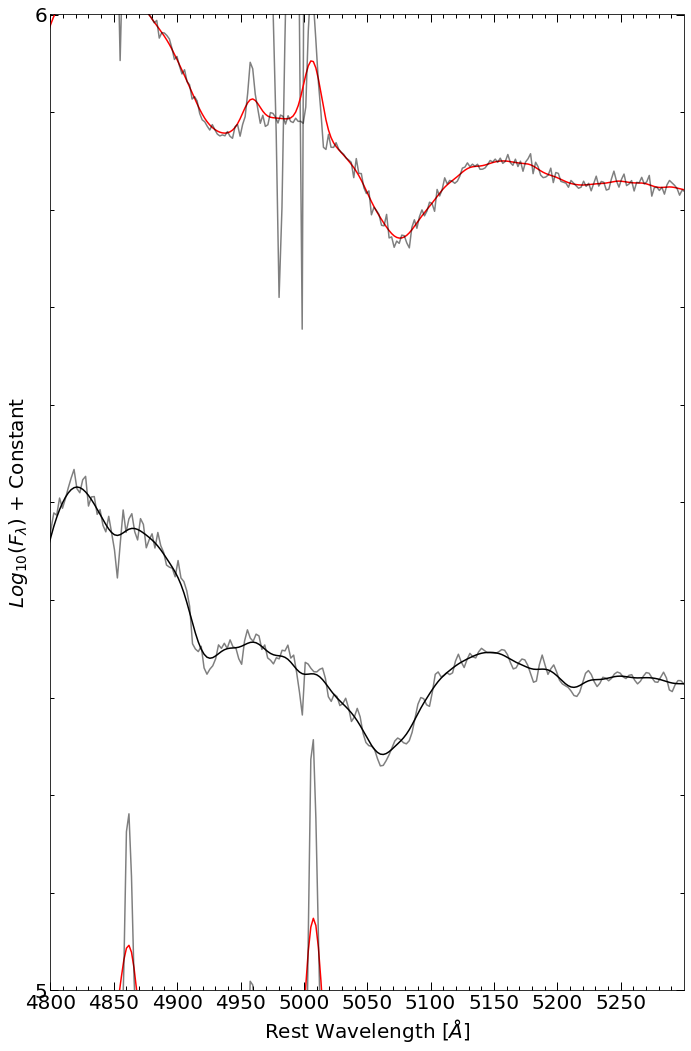

In [33]:
i = 0
scale = len(phase)*3.0/4.0
plt.figure(figsize=(10,15))
matplotlib.rcParams.update({'font.size': 20})

print(np.argsort(phase))
for ind in np.argsort(phase):
    wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
    wave = wave/(1.+z)
    
    w = [(wave > 5500) & (wave < 6000)][0]
    integ0 = np.trapz(flux[w],wave[w])
    off = 1.5/integ0
    flux = np.array([x*off for x in flux])
     
    color = 'black'
    if telescope[ind] == '-':
        color = 'red'
    fluxSmooth = np.array(gaussian_filter1d(flux, 3))
    plt.plot(wave,np.log10(fluxSmooth)+i+scale,color=color)
    plt.plot(wave,np.log10(flux)+i+scale,color='black',alpha=0.5)
    if round(phase[ind],1) == 1.3 and max(wave) < 9000:
        #plt.text(6500,np.log10(flux[-1])+i+scale-0.2,str(dates[ind][5:]),fontsize=18)
        #plt.text(6500,np.log10(flux[-1])+i+scale-0.3,str(round(phase[ind],1))+' d',fontsize=14)
        pass
    elif round(phase[ind],1) == 6.7:
        #plt.text(6500,np.log10(flux[-1])+i+scale-0.5,str(dates[ind][5:]),fontsize=18)
        #plt.text(6500,np.log10(flux[-1])+i+scale-0.6,str(round(phase[ind],1))+' d',fontsize=14)
        pass
    else:
        #plt.text(6500,np.log10(flux[-1])+i+scale,str(dates[ind][5:]),fontsize=18)
        #plt.text(6500,np.log10(flux[-1])+i+scale-0.1,str(round(phase[ind],1))+' d',fontsize=14)
        w = np.argmin(abs(wave-5400))
        #plt.text(5400,np.log10(flux[w])+i+scale+0.01,str(round(phase[ind],1))+' d',fontsize=14)
    i -= 0.5
    
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,10.00,1.0))
plt.gca().set_yticks(np.arange(0.0,10.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
xmin, xmax = 4800, 5300
plt.gca().set_xticks(np.arange(xmin,xmax,50))
plt.gca().set_xticks(np.arange(xmin,xmax,10), minor=True)
plt.gca().xaxis.set_ticks_position('both')

# telluric regions
plt.gca().axvspan(0.685/(1.+z)*1e4, 0.695/(1.+z)*1e4, alpha=0.25, color='grey')
plt.gca().axvspan(0.755/(1.+z)*1e4, 0.77/(1.+z)*1e4, alpha=0.25, color='grey')
plt.plot((0.685+0.695)/(2*(1.+z))*1e4,scale-2.1,marker='$\\bigoplus$',markersize=15,color='k')
plt.plot((0.755+0.77)/(2*(1.+z))*1e4,scale-2.1,marker='$\\bigoplus$',markersize=15,color='k')

# SN label
#plt.text(3500,0.2,'SN 2021gmj',fontsize=20,horizontalalignment='left')

#plt.axvline(x=5169,linestyle='--',color='blue')
#plt.axvline(x=4861,linestyle='--',color='blue')

plt.xlim([xmin,xmax])
#plt.xlim([4500,5500])
plt.ylim([5,6])
plt.tight_layout()
plt.show()